# A/B Testing. Project

## Contents
<a id='back'></a>

* [Introduction](#intro)
* [Hypothesis](#hypotheses)
    * [Data preparing](#preparing)
    * [Hypothesis selection](#hypotheses_selection)
* [Data overview and preparing](#data_review)
    * [Orders](#orders)
    * [Visits](#visits)
* [Analysis of A/B test results](#analysis)
    * [Total income by groups](#income_by_groups)
    * [Cumulative average order size by group](#average_order_size)
    * [Relative difference in cumulative average order size](#difference_in_order_size)
    * [Conversion rate](#conversion_rate)
    * [Orders per user](#orders_per_user)
    * [Order size](#order_size)
    * [Difference in conversion for the raw data](#difference_in_conversion_raw)
    * [Difference in orders for the raw data](#difference_in_orders_raw)
    * [Difference in conversion for the filtered data](#difference_in_conversion_filtered)
    * [Difference in orders for the filtered data](#difference_in_orders_filtered)
* [Conclusions](#conclusions)

## Introduction
<a id='intro'></a>

In this project, a base of hypotheses for increasing the profit of a large online store will be analyzed.
As a result of the analysis, a hypothesis will be selected, an A/B test will be conducted and its results will be studied.

Stages:
1. Prioritization of hypotheses.
2. Preprocessing of A/B test data.
3. Analysis of test results
4. Conclusions

[Back to Contents](#back)

## Hypothesis
<a id='hypotheses'></a>

Let's look at the data first.

### Data preparing
<a id='preparing'></a>

In [1]:
# import libraries
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read `hypotheses_us.csv` and print main info
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
hypotheses.info()
hypotheses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


We see:
* there are 9 hypotheses,
* no missing values,
* column types are as expected.

Great! Let's remove the capital letters from the column names and let's go.

In [3]:
# rename columns in `hypotheses`
hypotheses.columns = [name.lower() for name in hypotheses.columns.values]
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Great, done.

[Back to Contents](#back)

### Hypothesis selection
<a id='hypotheses_selection'></a>

To select a hypothesis we will use two methods:
* `ICE`,
* `RICE`.

First, let's prioritize hypotheses using the `ICE` method.

<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>⚠️ Reviewer's comment, v. 1</b> 
    
Here it would be good to display the names of the hypotheses in their entirety, for example like this
    
     pd.options.display.max_colwidth = 100

In [4]:
# calculation of `ICE`
hypotheses['ice'] = ((hypotheses['impact']
                     * hypotheses['confidence']
                    ) / hypotheses['effort']).round(2)

pd.options.display.max_colwidth = 130

hypotheses.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,effort,ice
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00


In terms of `ICE`, hypothesis 8 is the leader.
Let's see what this hypothesis is.

In [5]:
# print hypothesis 8
print(hypotheses.hypothesis[8])

Launch a promotion that gives users discounts on their birthdays


Now let's use the `RICE` method and see what changes.

In [6]:
# calculation of `RICE`
hypotheses['rice'] = (hypotheses['reach']
                     * hypotheses['impact']
                     * hypotheses['confidence']
                     ) / hypotheses['effort']
hypotheses.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,effort,ice,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0


As you can see, the list of five “best” hypotheses has not changed, but their order is now completely different.

Here hypothesis 7 is in the lead. Look at it:

In [7]:
# print hypothesis 7
print(hypotheses.hypothesis[7])

Add a subscription form to all the main pages. This will help you compile a mailing list


Changes in the prioritization list are due to the fact that different hypotheses cover different numbers of users.   
Although hypothesis 7 is good in every way, it will affect a very small number of users. But hypothesis 8 will definitely affect everyone. So let's check it out.

Well, let's move on to testing hypotheses

[Back to Contents](#back)

## Data overview and preparing
<a id='data_review'></a>

First, let's look at the data and see if there are any problems with it.

### Orders
<a id='orders'></a>

In [8]:
# read `orders_us.csv` and print main info
orders = pd.read_csv('/datasets/orders_us.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
# `date` column to datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [10]:
# rename columns in `orders`
orders.columns = [
    'transaction_id',
    'visitor_id',
    'date',
    'revenue',
    'group'
]
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
# print more info about `orders`
orders.info()
print()
print('Duplicated rows in the `orders`:', orders.duplicated().sum())
print()
print('Duplicated `transaction_id` in the `orders`:', orders.transaction_id.duplicated().sum())
print()
print('Earliest order:', orders.date.min())
print()
print('Latest order:', orders.date.max())
print()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB

Duplicated rows in the `orders`: 0

Duplicated `transaction_id` in the `orders`: 0

Earliest order: 2019-08-01 00:00:00

Latest order: 2019-08-31 00:00:00



,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Now let's find out if there are errors in dividing users into groups.

In [12]:
# check errors in dividing into groups
orders.groupby('visitor_id')['group'].nunique().value_counts()

1    973
2     58
Name: group, dtype: int64

Wow, there really are a lot of mistakes. Unfortunately, we will not be able to find out details about these users as part of this project, so we will have to delete all orders from these users.

In [13]:
# remove users with errors in dividing
count_of_groups = orders.groupby('visitor_id')['group'].nunique()
list_of_errors = count_of_groups[count_of_groups == 2].index

In [14]:
orders = orders[~orders['visitor_id'].isin(list_of_errors)]
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


Let's check if we have removed all the errors.

In [15]:
# check errors in dividing into groups
orders.groupby('visitor_id')['group'].nunique().value_counts()

1    973
Name: group, dtype: int64

Yes, all.

So we:
* renamed the columns,
* checked that there are no missing values in the table,
* checked that there are no duplicates,
* fixed the erroneous dividing of users into groups,
* found out the timing of the experiment (all orders were made during August 2019).

Great, we can move on to `visits`.

[Back to Contents](#back)

### Visits
<a id='visits'></a>

In [16]:
# read `visits_us.csv` and print main info
visits = pd.read_csv('/datasets/visits_us.csv')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
# `date` column to datetime
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [18]:
# print more info about `visits`
visits.info()
print()
print('Duplicated rows in the `visits`:', visits.duplicated().sum())
print()
print('Earliest visit:', visits.date.min())
print()
print('Latest visit:', visits.date.max())
print()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB

Duplicated rows in the `visits`: 0

Earliest visit: 2019-08-01 00:00:00

Latest visit: 2019-08-31 00:00:00



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
# check errors in dividing into groups
print(visits.group.unique())
visits.groupby('date')['group'].nunique().value_counts()

['A' 'B']


2    31
Name: group, dtype: int64

Unfortunately, we will not be able to take into account remote visitors here, since we have nowhere to get additional information about errors.

But at least we checked that there are no other errors:
* the date range in the two files is the same,
* no duplicates or missing values,
* for each day of the month there is data for groups A and B, that is, the data is correct.

[Back to Contents](#back)

## Analysis of A/B test results
<a id='analysis'></a>

Well, let's move on to the analysis.

### Total income by groups
<a id='income_by_groups'></a>

Let's see how total income changes by group over time.

In [20]:
# create a list of dates
datesGroups = orders[['date', 'group']].drop_duplicates()

# create a list with aggregated sum of orders
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# create a list with aggregated count of visitors
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# merge two dataframes
cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]

cumulativeRevenueA = (
    cumulativeData[cumulativeData['group']=='A']
    [['date','revenue', 'orders']]
)

cumulativeRevenueB = (
    cumulativeData[cumulativeData['group']=='B']
    [['date','revenue', 'orders']]
) 

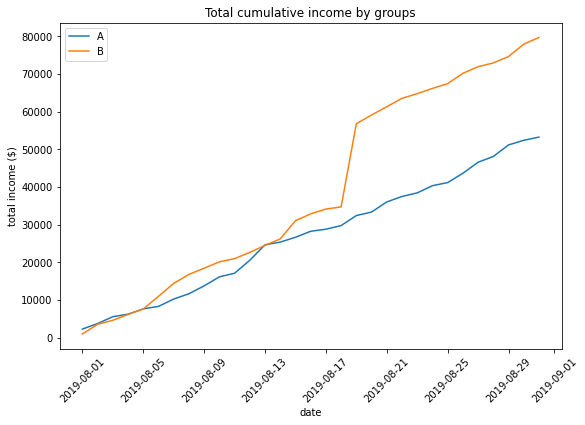

In [21]:
# visualize total income
plt.subplots(figsize=(9, 6))

plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'],
         label='A'
        )

plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'],
         label='B'
        )

plt.title('Total cumulative income by groups')
plt.xlabel('date')
plt.ylabel('total income ($)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

During the first two weeks, the income is almost the same in the two groups, in group B it is only slightly higher.   
But in the middle of the test in group B there is a very sharp jump. It may be associated with a local anomaly in orders, we will look at the anomalies carefully later.

[Back to contents](#back)

### Cumulative average order size by group
<a id='average_order_size'></a>

What about the average order size by group?   
We will again look at the cumulative average.

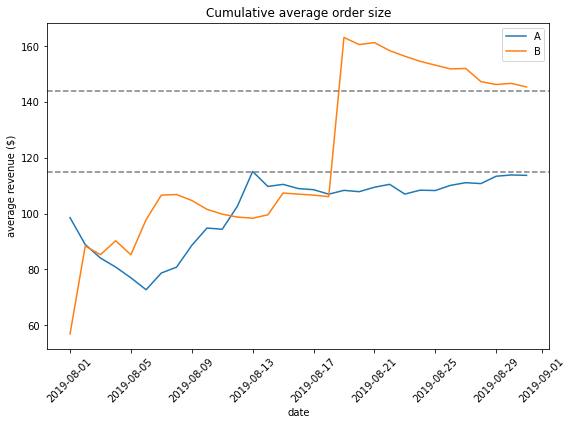

In [22]:
# visualize cumulative average order size by group
plt.subplots(figsize=(9, 6))

plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
         label='A'
        )

plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
         label='B'
        )

plt.title('Cumulative average order size')
plt.xlabel('date')
plt.ylabel('average revenue ($)')
plt.axhline(y=115, color='gray', linestyle='--')
plt.axhline(y=144, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.legend()
plt.show()

The situation is similar here. It seems that the average order size in group B is higher. But due to an abnormally large order in the middle of the month, it is difficult to assess the real difference between the groups.

[Back to contents](#back)

### Relative difference in cumulative average order size
<a id='difference_in_order_size'></a>

Let us now plot the relative difference in the cumulative average order size for group B compared to group A.

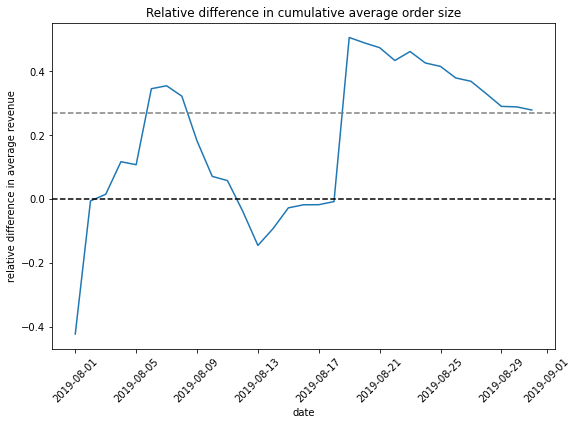

In [23]:
# visualize relative difference in cumulative average order size
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.subplots(figsize=(9, 6))

plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']
         /mergedCumulativeRevenue['ordersB']
         )/(mergedCumulativeRevenue['revenueA']
            /mergedCumulativeRevenue['ordersA']
           )-1
        )

plt.title('Relative difference in cumulative average order size')
plt.xlabel('date')
plt.ylabel('relative difference in average revenue')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.27, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.show()

Relative difference in cumulative average order size

Let us now plot the relative difference in the cumulative average order size for group B compared to group A.

By the middle of the month, there was a feeling that the schedule was gradually stabilizing, and the average order size in group B was quite a bit less than in group A. But due to the jump in group B, we cannot say anything for sure.

[Back to contents](#back)

### Conversion rate
<a id='conversion_rate'></a>

Let's calculate the conversion rate of each group as the ratio of orders per day to the number of visits, and build a visualization.

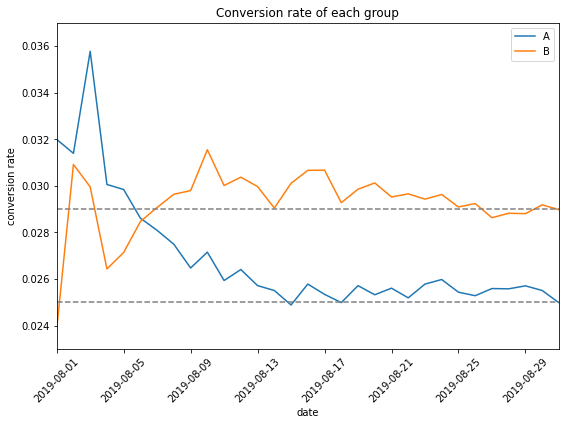

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.subplots(figsize=(9, 6))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), 0.023, 0.037])

plt.title('Conversion rate of each group')
plt.xlabel('date')
plt.ylabel('conversion rate')
plt.xticks(rotation=45)
plt.axhline(y=0.029, color='grey', linestyle='--')
plt.axhline(y=0.025, color='grey', linestyle='--')
plt.show()

Although in the first days the conversion in group A was higher, by the end of the first week the conversion became higher in group B, and this remained until the end of the test.   
At the same time, the difference seems very small - tenths of a percent. But it's quite significant because the conversion rate for each group is less than 3 percent.

Let's also look at relative conversion.

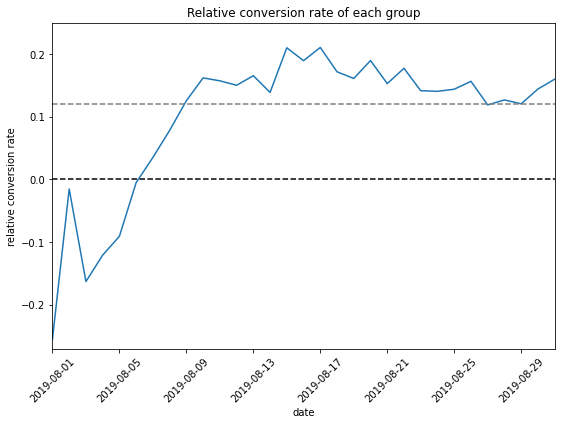

In [25]:
# visualize relative difference in conversion
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.subplots(figsize=(9, 6))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-08-31'), -0.27, 0.25])

plt.title('Relative conversion rate of each group')
plt.xlabel('date')
plt.ylabel('relative conversion rate')
plt.xticks(rotation=45)
plt.show()

This graph does not provide much new information, however, we are once again convinced that the conversion in group B exceeds the conversion in group A by a little more than a tenth.   
This already seems like a pretty significant difference!

[Back to contents](#back)

### Orders per user
<a id='orders_per_user'></a>

Let's find out how many orders users made on average during the experiment.

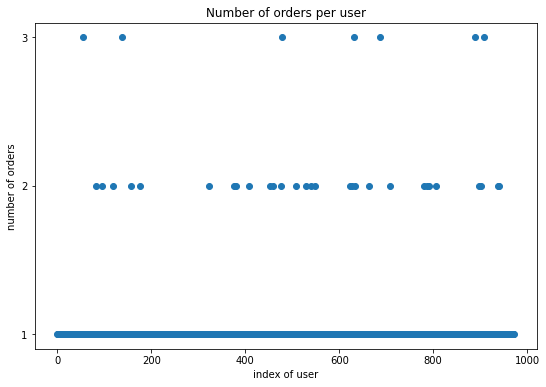

In [26]:
# visualize count of orders per user
count_of_orders = orders.groupby('visitor_id')['transaction_id'].count()

plt.subplots(figsize=(9, 6))

x_values = pd.Series(range(0, len(count_of_orders)))
plt.scatter(x_values, count_of_orders)

plt.title('Number of orders per user')
plt.xlabel('index of user')
plt.ylabel('number of orders')
plt.yticks(ticks=[1, 2, 3])
plt.show()

It seems that the user usually makes one order, but sometimes 2 or 3.   
Let's calculate the percentiles to find out more precisely.

In [27]:
# calculate the 95th and 99th percentiles of orders per user
print(np.percentile(count_of_orders, [95, 99]))

[1. 2.]


Well, we see that less than 5 percent make a second order. That is, all users who made more than one order can be considered anomalous.

What about order sizes?

[Back to contents](#back)

### Order size
<a id='order_size'></a>

Here let's determine from what amount orders should be considered abnormal.

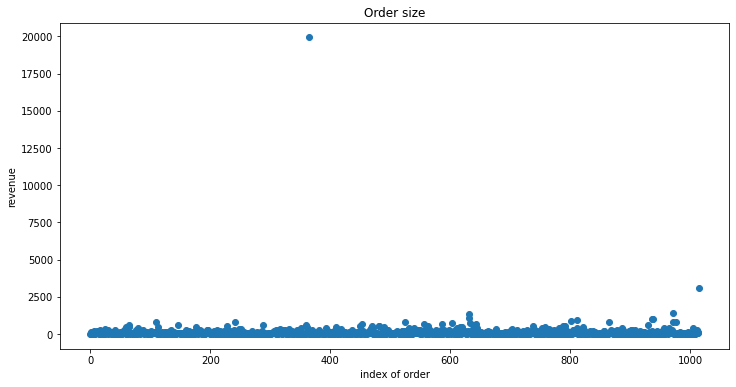

In [28]:
# visualize order size
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.subplots(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])

#plt.ylim((0, 1500))
plt.title('Order size')
plt.xlabel('index of order')
plt.ylabel('revenue')
plt.show()

We don't have very many emissions, but one of them is really significant.

Most of them seem to be under a thousand dollars.   
Again, let's calculate the percentile to get more accurate data.

In [29]:
# calculate the 95th and 99th percentiles of order size
print(np.percentile(orders['revenue'], [95, 99]))

[414.275 830.3  ]


Well, let's consider all orders over 500 dollars abnormal.   
And now we can compare conversion and average order size for groups, taking into account outliers. Let's look at the statistical significance of the difference before and after filtering.

[Back to contents](#back)

### Difference in conversion for the raw data
<a id='difference_in_conversion_raw'></a>

To understand how different the results for the two groups really are, let's determine the statistical significance of the difference in conversion between the groups.   
That is, we will check whether the hypothesis is true that the difference in conversion for groups A and B is **not** statistically significant.   
If the resulting `p` value is greater than the cut-off value of 0.05, we will consider the hypothesis to be true.
Let's start with the raw data.

In [30]:
# calculate statistical significance of the difference in conversion for the raw data
ordersByUsersA = (
    orders[orders['group']=='A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group']=='B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique}))
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = (
    pd.concat([ordersByUsersA['orders'],
               pd.Series(
                   0, 
                   index=np.arange(
                       visits[visits['group']=='A']['visits'].sum() 
                       - len(ordersByUsersA['orders'])), 
                   name='orders')],
              axis=0)
)

sampleB = (
    pd.concat([ordersByUsersB['orders'],
               pd.Series(
                   0,
                   index=np.arange(
                       visits[visits['group']=='B']['visits'].sum()
                       - len(ordersByUsersB['orders'])),
                   name='orders')],
              axis=0)
)

print('Statistical significance of the difference in conversion:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Difference in average conversion values by group:', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

Statistical significance of the difference in conversion: 0.01102
Difference in average conversion values by group: 0.160


We got a p-value of 0.01, which tells us that there is a statistically significant difference in conversion.
That is, we can reject the null hypothesis that there is no statistically significant difference in conversion between groups.
In addition, the relative difference is quite noticeable: for group B, the average conversion is a whopping 16% higher (second line of output).

[Back to contents](#back)

### Difference in orders for the raw data
<a id='difference_in_orders_raw'></a>

Now let's determine the statistical significance of the difference in average order size between groups.   
We'll start again with the raw data.   
If the `p` value is greater than the cut-off value of 0.05, we will consider the hypothesis to be true. That is, that there is **no** statistical significance between groups in average order size.

In [31]:
# calculate statistical significance of the difference in order size for the raw data
print('Statistical significance of the difference in order size:', '{0:.3f}'.format(
          stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                             orders[orders['group']=='B']['revenue']
                            )[1])
     )

print('Difference in average order size by group:', '{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()
    /orders[orders['group']=='A']['revenue'].mean()
    -1)
     )

Statistical significance of the difference in order size: 0.862
Difference in average order size by group: 0.278


P-value 0.862 higher than 0.05, so there is no reason to reject the null hypothesis and conclude that the average order size differs between groups.   
Moreover, the average order size for group B is much bigger than for group A. This difference appears to be due to outliers. We'll soon look at the results for the filtered data and see if this is true.

Let's recall the order quantity and average order size percentiles that we found earlier and look at the statistical difference for the filtered data.

[Back to contents](#back)

### Difference in conversion for the filtered data
<a id='difference_in_conversion_filtered'></a>

Okay, we've sorted out the initial data.
Now let’s filter out abnormal orders and look again at the statistical significance of the difference in conversion.

Recall that we are testing the validity of the hypothesis that the difference in conversion for groups A and B is **not** statistically significant.

In [32]:
# calculate statistical significance of the difference in conversion for the filtered data
usersWithManyOrders = (
    pd.concat(
        [ordersByUsersA[ordersByUsersA['orders'] >= 2]['visitor_id'], 
         ordersByUsersB[ordersByUsersB['orders'] >= 2]['visitor_id']
        ], 
        axis = 0)
)
usersWithExpensiveOrders = orders[orders['revenue'] > 800]['visitor_id']

abnormalUsers = (
    pd.concat(
        [usersWithManyOrders, usersWithExpensiveOrders], 
        axis = 0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = (
    pd.concat(
        [ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id']
                           .isin(abnormalUsers))]['orders'],
         pd.Series(0,
                   index=np.arange(
                       visits[visits['group']=='A']['visits'].sum() 
                       - len(ordersByUsersA['orders'])),name='orders')],
        axis=0)
)

sampleBFiltered = (
    pd.concat(
        [ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id']
                           .isin(abnormalUsers))]['orders'],
         pd.Series(0,
                   index=np.arange(
                       visits[visits['group']=='B']['visits'].sum() 
                       - len(ordersByUsersB['orders'])),name='orders')],
        axis=0)
)

In [33]:
# calculate statistical significance of the difference in order size for the filtered data
print('Statistical significance of the difference in conversion:', "{0:.5f}".format(
    stats.mannwhitneyu(sampleAFiltered,
                       sampleBFiltered)[1])
     )

print('Difference in average conversion values by group:', "{0:.3f}".format(
    sampleBFiltered.mean()
    /sampleAFiltered.mean()
    -1)
     )

Statistical significance of the difference in conversion: 0.00728
Difference in average conversion values by group: 0.191


Look, the results for the filtered data are even more revealing.   
The p value just got smaller. That is, we still reject the null hypothesis. That is, there is a statistically significant difference.   
At the same time, the relative conversion rate increased from 16 to 19 percent.


[Back to contents](#back)

### Difference in orders for the filtered data
<a id='difference_in_orders_filtered'></a>

Finally, let's determine the statistical significance of the difference in average order size for the filtered data.

This time we are testing the hypothesis that there is **no** statistical significance between groups in average order size.

In [34]:
print('Statistical significance of the difference in conversion:', 
    '{0:.3f}'
    .format(stats.mannwhitneyu(
    orders[
        np.logical_and(
            orders['group']=='A',
            np.logical_not(
                orders['visitor_id']
                .isin(abnormalUsers)
            )
        )]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(
            orders['visitor_id']
            .isin(abnormalUsers)
        )
    )]['revenue'])[1])
)

print('Difference in average conversion values by group:', 
    '{0:.3f}'
    .format(
        orders[np.logical_and(
            orders['group']=='B',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers))
        )]['revenue']
        .mean()
        / orders[np.logical_and(
            orders['group']=='A',
            np.logical_not(
                orders['visitor_id']
                .isin(abnormalUsers)
            )
        )]['revenue']
        .mean() - 1)
)



Statistical significance of the difference in conversion: 0.921
Difference in average conversion values by group: 0.026


For the average order size, the results changed more.   
The p value is still higher than `0,05` and there is no reason to reject the null hypothesis.   
However, the average order size appears to be almost the same for the two groups after filtering out the anomalies. Look: only 2.6% instead of 28 for unfiltered data! This is an impressive result.

[Back to contents](#back)

## Сonclusions
<a id='conclusions'></a>

So, our research is completed.

1. We sorted the hypotheses using the `ICE` and `RICE` methods.
2. We chose the leading hypothesis from the `RICE` method for analysis, since it affects significantly more users and therefore may be more useful for the company.
Hypothesis №7 chosen for analysis:   
**Add a subscription form to all the main pages. This will help you compile a mailing list.**
3. Visualized `Total income`, `Cumulative average order size`, `Relative difference in order size`, and `Conversion rate`.
From the resulting graphs we see that:
* by the end of the experiment, all average indicators behave normally,
* all indicators for group B are better than for group A (conversion, average order size and overall profit are higher),
* but there are sharp jumps, most likely this means that there are anomalous orders that may affect the results of the study.
4. We identified anomalies in order size and quantity to assess the impact of outliers.
5. Finally, we determined the statistical significance of the difference for conversion and order size in the unfiltered and filtered data.

**Conclusions.**

The experiment should be stopped and Group B should be considered the leader.   
Despite the fact that the average order size is almost the same for both groups (the reason for the initial difference was abnormally large orders), the conversion in group B is significantly higher, that is, site visitors in group B actually place orders more often.   
Hypothesis №7 turned out to be successful. The new email settings really increased conversions.

[Back to Contents](#back)